    product  total_qty  revenue
0  Keyboard          9    405.0
1    Laptop          6   4500.0
2   Monitor          5    750.0
3     Mouse         15    300.0


<Figure size 800x500 with 0 Axes>

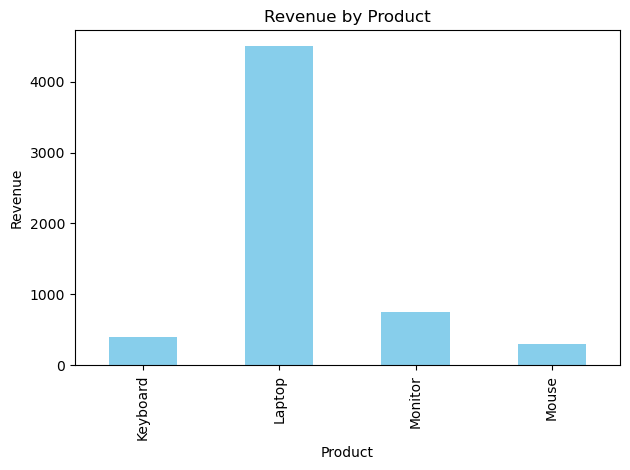

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("sale_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sale (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Insert sample data
sample_data = [
    ('Laptop', 4, 750.0),
    ('Mouse', 10, 20.0),
    ('Keyboard', 6, 45.0),
    ('Monitor', 3, 150.0),
    ('Laptop', 2, 750.0),
    ('Mouse', 5, 20.0),
    ('Keyboard', 3, 45.0),
    ('Monitor', 2, 150.0)
]
cursor.executemany('INSERT INTO sale (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

# Query total quantity and revenue per product
query = '''
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sale
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
print(df)

# Plot revenue by product
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()